In [1]:
%load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


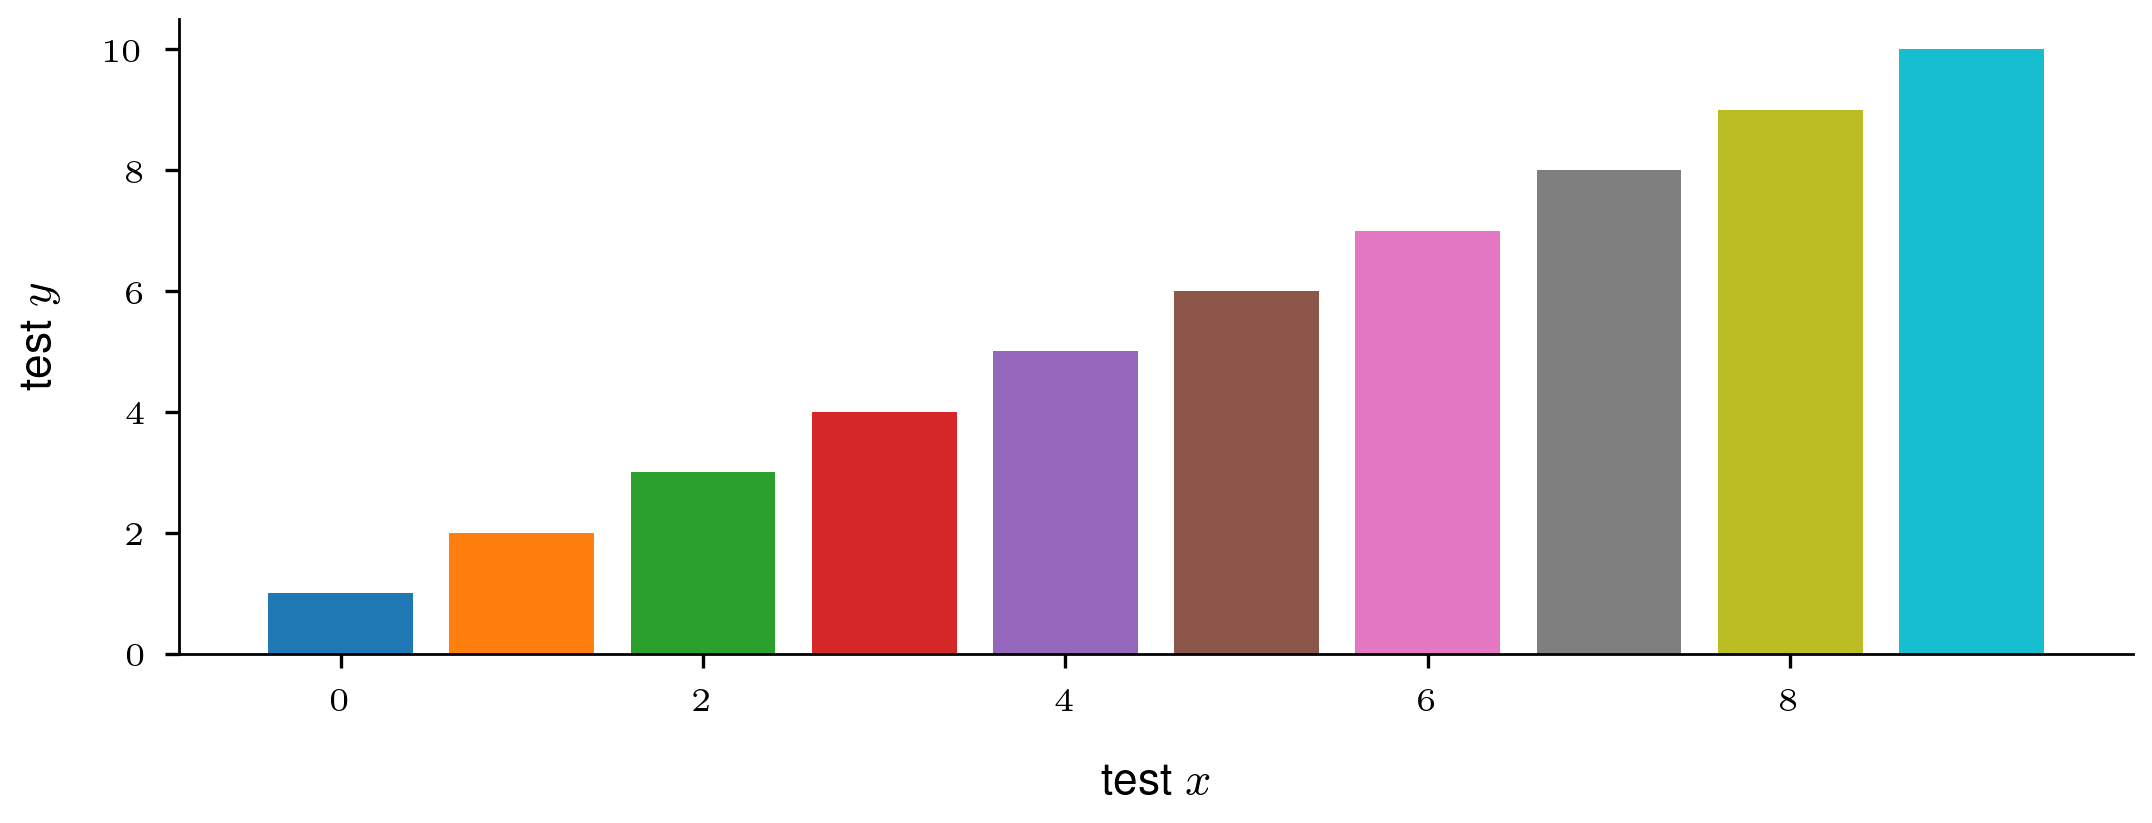

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['paper.mplstyle'])

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

In [3]:
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/ramping_small/n_50_0.000003"
thetas_small = np.loadtxt(f"{dir}/thetas_0_500")
targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._0.025/targets")
rates = np.loadtxt(f"{dir}/rates_0_500")
plt.plot(thetas_small[:,0], thetas_small[:,1])
plt.scatter(targets[:,0],targets[:,1])
plt.plot(rates[:,:10])
plt.figure()
plt.plot(thetas_small[:,2]**2 + thetas_small[:,3]**2)

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._0.025/targets not found.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
palette = sns.color_palette("hls",10)
rdn_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn/seed_0_mixed"
skew_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_skew/seed_0_mixed"
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_soc/seed_0_mixed"
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/ramping_small/n_50_0.000003"
vprep = np.loadtxt(f"{dir}/analysis/vprep")
vmov = np.loadtxt(f"{dir}/analysis/vmov")
pct_var = np.loadtxt(f"{dir}/analysis/capt_var")
pct_var = np.concatenate([pct_var[0,:][None,:], pct_var[1:,:] - pct_var[0:-1,:]],axis=0)
# pct_var_own = np.loadtxt(f"{dir}/analysis/pct_var_own")
def proj_mov(i):
    return np.loadtxt(f"{dir}/analysis/proj_mov_{i}")

def proj_prep(i):
    return np.loadtxt(f"{dir}/analysis/proj_prep_{i}")
def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')

def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')
def us(t, i = 3):
    return np.loadtxt(f'{dir}/us_{i}_{t}')

soc_alignment =  np.loadtxt(f"{dir}/analysis/capt_var")[-1,0]
baseline_soc =  np.mean(np.loadtxt(f"{dir}/analysis/baseline_alignments"))
skew_alignment =  np.loadtxt(f"{skew_dir}/analysis/capt_var")[-1,0]
baseline_skew =  np.mean(np.loadtxt(f"{skew_dir}/analysis/baseline_alignments"))
rdn_alignment =  np.loadtxt(f"{rdn_dir}/analysis/capt_var")[-1,0]
baseline_rdn =  np.mean(np.loadtxt(f"{rdn_dir}/analysis/baseline_alignments"))
fig = plt.figure(figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.45)
gs = gridspec.GridSpec(4, 2)
#ax12 = plt.subplot(gs[5, 1])
ax01 = plt.subplot(gs[0, 0])
ax012= plt.subplot(gs[1, 0])
pos = ax012.get_position()
ax012.set_position([pos.x0, pos.y0 - 0.06, pos.width, pos.height + 0.03])
axal = plt.subplot(gs[2:, 0])
pos_a = axal.get_position()
axal.set_position([pos_a.x0, pos_a.y0 - 0.064, pos_a.width, pos_a.height - 0.064])
ax131 = plt.subplot(gs[0, 1])
ax132 = plt.subplot(gs[1, 1])
pos132 = ax132.get_position()
ax132.set_position([pos132.x0, pos132.y0 - 0.052, pos132.width, pos132.height])
ax14 = plt.subplot(gs[2:, 1])
pos14 = ax14.get_position()
ax14.set_position([pos14.x0, pos_a.y0 - 0.064, pos14.width, pos14.height])

for d in range(5):
    ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g')
    ax01.bar(d, pct_var[d,1], width = 0.2, color='r')
d = 5
ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g', label="Prep.")
ax01.bar(d, pct_var[d,1], width = 0.2, color='r', label="Move")
ax01.set_ylabel("$\\%$ var. \n in prep.")
ax01.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax01.set_xticks([0,1,2,3,4,5,6,7],[],fontsize=fs)
ax01.legend()

for d in range(5):
    ax012.bar(d - 0.25, pct_var[d,3], width = 0.2, color='r')
    ax012.bar(d, pct_var[d,0], width = 0.2, color='g')
ax012.set_ylabel("$\\%$ var \n in mov.")
ax012.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax012.set_xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8],fontsize=fs)
ax012.set_xlabel("PC")
for i in np.arange(5):
    ax131.plot(proj_prep(i)[:,0], color = palette[i])
ax131.axvline(x = 250,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax131.set_xticks([])
ax131.set_yticks([-2.5,0.,2.5],[-2.5,0.,2.5], fontsize=fs)
ax131.set_ylabel("prep. proj")
current_pos = ax132.get_position()
for i in np.arange(5):
    ax132.plot(proj_mov(i)[:,0], color = palette[i])
ax132.axvline(x = 250,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax132.set_xticks([])
ax132.set_yticks([-2.5,0.,2.5],[-2.5,0.,2.5], fontsize=fs)
ax132.set_ylabel("mov. proj")
current_pos = ax14.get_position()
ax14.plot(vmov, label = "mov")
ax14.plot(vprep, label = "prep")
ax14.axvline(x = 250,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax14.legend()
ax14.set_ylabel("occupancy")
ax14.set_xlabel("time (ms)")
ax14.set_xticks([0,250,400], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs)
ax14.set_yticks([0,0.5,1], [0,0.5,1], fontsize =fs)


#alignment plot
axal.bar(0, soc_alignment, width = 0.1, color = "gray", edgecolor="k", hatch = "/", label="network")
axal.bar(0.25, baseline_soc,  width = 0.1, color = "w", edgecolor="k", hatch = "/", label="control")
axal.bar(1, skew_alignment,  width = 0.1, color = "gray", edgecolor="k", hatch = "/")
axal.bar(1.25, baseline_skew,  width = 0.1, color = "w", edgecolor="k", hatch = "/")
axal.bar(2, rdn_alignment,  width = 0.1, color = "gray", edgecolor="k", hatch = "/")
axal.bar(2.25, baseline_rdn,  width = 0.1, color = "w", edgecolor="k", hatch = "/")
axal.set_xticks([0.2, 1.2, 2.2], ["SOC", "Skew", "Random"], fontsize = fs)
axal.legend(loc = (0.65, 0.75))
axal.set_ylabel("alignment")
axal.set_yticks([0,0.25, 0.5], [0,0.25, 0.5], fontsize = fs)
fig.text(0.07, 0.94, '$\\textbf{A}$', size = 16)
fig.text(0.07, 0.39, '$\\textbf{B}$', size = 16)
fig.text(0.5, 0.94, '$\\textbf{C}$', size = 16)
plt.show()
fig.savefig("orthogonality.pdf", format = "pdf", bbox_inches='tight')

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/ramping_small/n_50_0.000003/analysis/vprep not found.

IndexError: index 6 is out of bounds for axis 0 with size 6

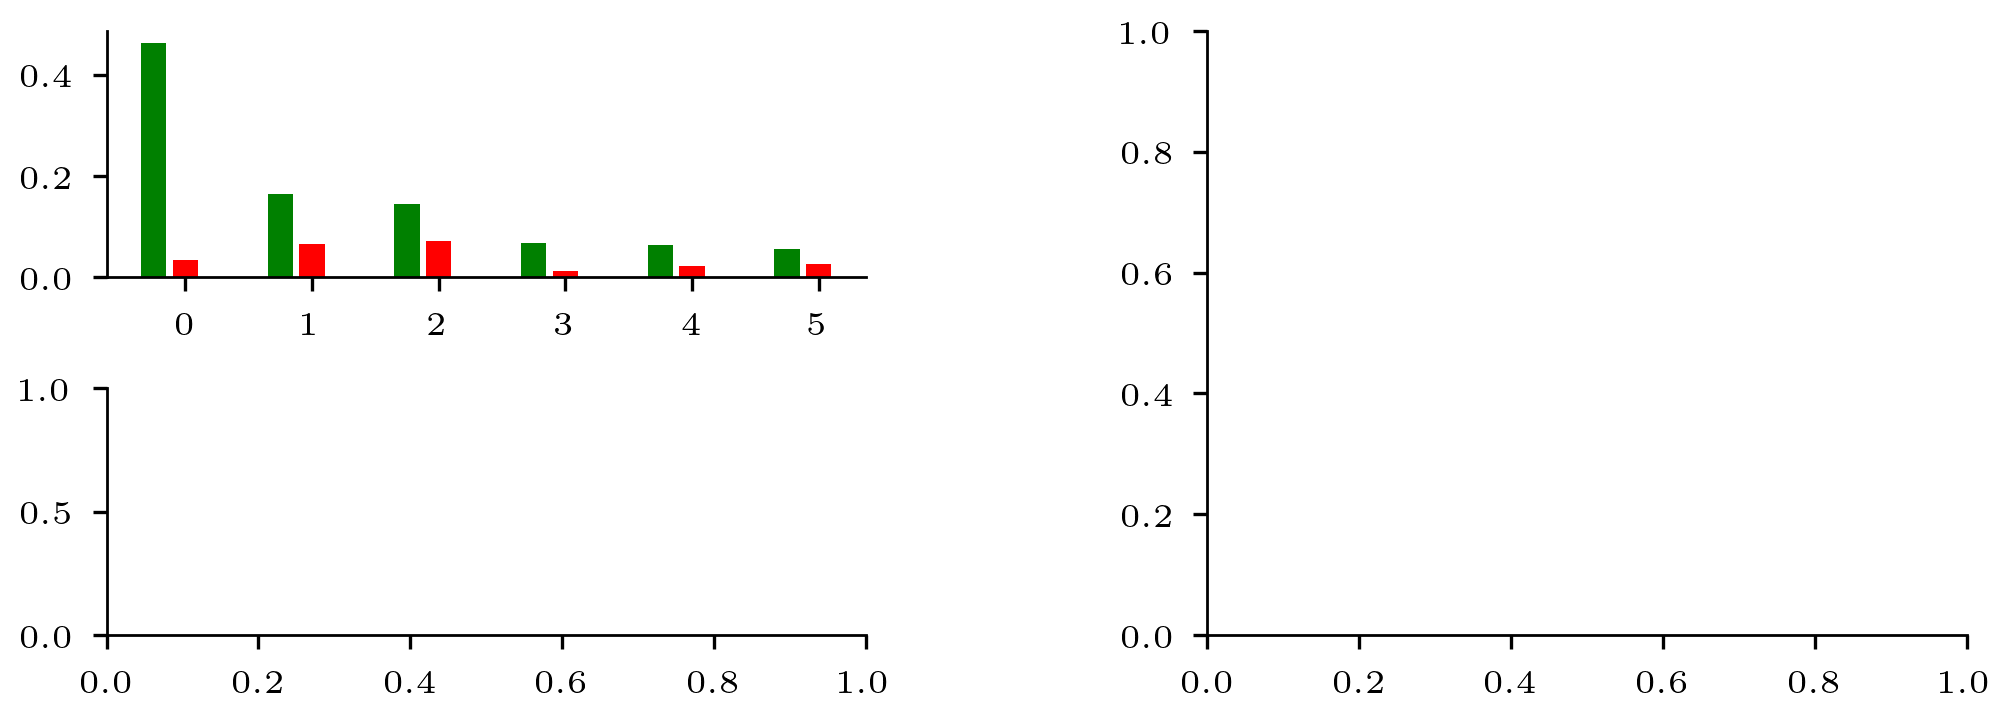

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
palette = sns.color_palette("hls",10)
dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_soc/seed_0_mixed"
vprep = np.loadtxt(f"{dir}/analysis/vprep")
vmov = np.loadtxt(f"{dir}/analysis/vmov")
pct_var = np.loadtxt(f"{dir}/analysis/capt_var")
pct_var = np.concatenate([pct_var[0,:][None,:], pct_var[1:,:] - pct_var[0:-1,:]],axis=0)
# pct_var_own = np.loadtxt(f"{dir}/analysis/pct_var_own")
def proj_mov(i):
    return np.loadtxt(f"{dir}/analysis/proj_mov_{i}")

def proj_prep(i):
    return np.loadtxt(f"{dir}/analysis/proj_prep_{i}")
def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')

def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')
def us(t, i = 3):
    return np.loadtxt(f'{dir}/us_{i}_{t}')

soc_alignment =  np.loadtxt(f"{dir}/analysis/capt_var")[-1,0]
baseline_soc =  np.mean(np.loadtxt(f"{dir}/analysis/baseline_alignments"))
skew_alignment =  np.loadtxt(f"{skew_dir}/analysis/capt_var")[-1,0]
baseline_skew =  np.mean(np.loadtxt(f"{skew_dir}/analysis/baseline_alignments"))
rdn_alignment =  np.loadtxt(f"{rdn_dir}/analysis//capt_var")[-1,0]
baseline_rdn =  np.mean(np.loadtxt(f"{rdn_dir}/analysis/baseline_alignments"))
fig = plt.figure(figsize=(6, 2), dpi = 400)
plt.subplots_adjust(hspace=0.45)
plt.subplots_adjust(wspace=0.45)
gs = gridspec.GridSpec(2, 2)
#ax12 = plt.subplot(gs[5, 1])
ax01 = plt.subplot(gs[0, 0])
ax02= plt.subplot(gs[1, 0])
ax1= plt.subplot(gs[:,1])

for d in range(7):
    ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g')
    ax01.bar(d, pct_var[d,1], width = 0.2, color='r')
d = 7
ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g', label="Prep.")
ax01.bar(d, pct_var[d,1], width = 0.2, color='r', label="Move")
ax01.set_ylabel("$\\%$ var. \n in prep.")
ax01.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax01.set_xticks([0,1,2,3,4,5,6,7],[],fontsize=fs)
ax01.legend()

for d in range(7):
    ax02.bar(d - 0.25, pct_var[d,3], width = 0.2, color='r')
    ax02.bar(d, pct_var[d,0], width = 0.2, color='g')
ax02.set_ylabel("$\\%$ var \n in mov.")
ax02.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax02.set_xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8],fontsize=fs)
ax02.set_xlabel("PC")
ax1.plot(vmov, label = "mov")
ax1.plot(vprep, label = "prep")
ax1.axvline(x = 250,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax1.legend()
ax1.set_ylabel("occupancy")
ax1.set_xlabel("time (ms)")
ax1.set_xticks([0,250,400], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs)
ax1.set_yticks([0,0.5,1], [0,0.5,1], fontsize =fs)

fig.text(0.07, 0.94, '$\\textbf{A}$', size = 16)
fig.text(0.5, 0.94, '$\\textbf{B}$', size = 16)
plt.show()
fig.savefig("skew_orthogonality.pdf", format = "pdf", bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
palette = sns.color_palette("hls",10)

dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn/seed_0_mixed"
vprep = np.loadtxt(f"{dir}/analysis/vprep")
vmov = np.loadtxt(f"{dir}/analysis/vmov")
pct_var = np.loadtxt(f"{dir}/analysis/capt_var")
pct_var = np.concatenate([pct_var[0,:][None,:], pct_var[1:,:] - pct_var[0:-1,:]],axis=0)
# pct_var_own = np.loadtxt(f"{dir}/analysis/pct_var_own")
def proj_mov(i):
    return np.loadtxt(f"{dir}/analysis/proj_mov_{i}")

def proj_prep(i):
    return np.loadtxt(f"{dir}/analysis/proj_prep_{i}")
def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')

def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')
def us(t, i = 3):
    return np.loadtxt(f'{dir}/us_{i}_{t}')

soc_alignment =  np.loadtxt(f"{dir}/analysis/capt_var")[-1,0]
baseline_soc =  np.mean(np.loadtxt(f"{dir}/analysis/baseline_alignments"))
skew_alignment =  np.loadtxt(f"{skew_dir}/analysis/capt_var")[-1,0]
baseline_skew =  np.mean(np.loadtxt(f"{skew_dir}/analysis/baseline_alignments"))
rdn_alignment =  np.loadtxt(f"{rdn_dir}/analysis//capt_var")[-1,0]
baseline_rdn =  np.mean(np.loadtxt(f"{rdn_dir}/analysis/baseline_alignments"))
fig = plt.figure(figsize=(6, 2), dpi = 400)
plt.subplots_adjust(hspace=0.45)
plt.subplots_adjust(wspace=0.45)
gs = gridspec.GridSpec(2, 2)
#ax12 = plt.subplot(gs[5, 1])
ax01 = plt.subplot(gs[0, 0])
ax02= plt.subplot(gs[1, 0])
ax1= plt.subplot(gs[:,1])

for d in range(7):
    ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g')
    ax01.bar(d, pct_var[d,1], width = 0.2, color='r')
d = 8
ax01.bar(d - 0.25, pct_var[d,2], width = 0.2, color='g', label="Prep.")
ax01.bar(d, pct_var[d,1], width = 0.2, color='r', label="Move")
ax01.set_ylabel("$\\%$ var. \n in prep.")
ax01.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax01.set_xticks([0,1,2,3,4,5,6,7],[],fontsize=fs)
ax01.legend()

for d in range(7):
    ax02.bar(d - 0.25, pct_var[d,3], width = 0.2, color='r')
    ax02.bar(d, pct_var[d,0], width = 0.2, color='g')
ax02.set_ylabel("$\\%$ var \n in mov.")
ax02.set_yticks([0,0.5],[0,0.5],fontsize=fs)
ax02.set_xticks([0,1,2,3,4,5,6,7],[1,2,3,4,5,6,7,8],fontsize=fs)
ax02.set_xlabel("PC")
ax1.plot(vmov, label = "mov")
ax1.plot(vprep, label = "prep")
ax1.axvline(x = 250,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax1.legend()
ax1.set_ylabel("occupancy")
ax1.set_xlabel("time (ms)")
ax1.set_xticks([0,250,400], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs)
ax1.set_yticks([0,0.5,1], [0,0.5,1], fontsize =fs)

fig.text(0.07, 0.94, '$\\textbf{A}$', size = 16)
fig.text(0.5, 0.94, '$\\textbf{B}$', size = 16)
plt.show()
fig.savefig("rdn_orthogonality.pdf", format = "pdf", bbox_inches='tight')

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn/seed_0_mixed/analysis/vprep not found.

## Just the occupancy ##

(551, 200)
(111, 1)
(111, 1) (111, 1)


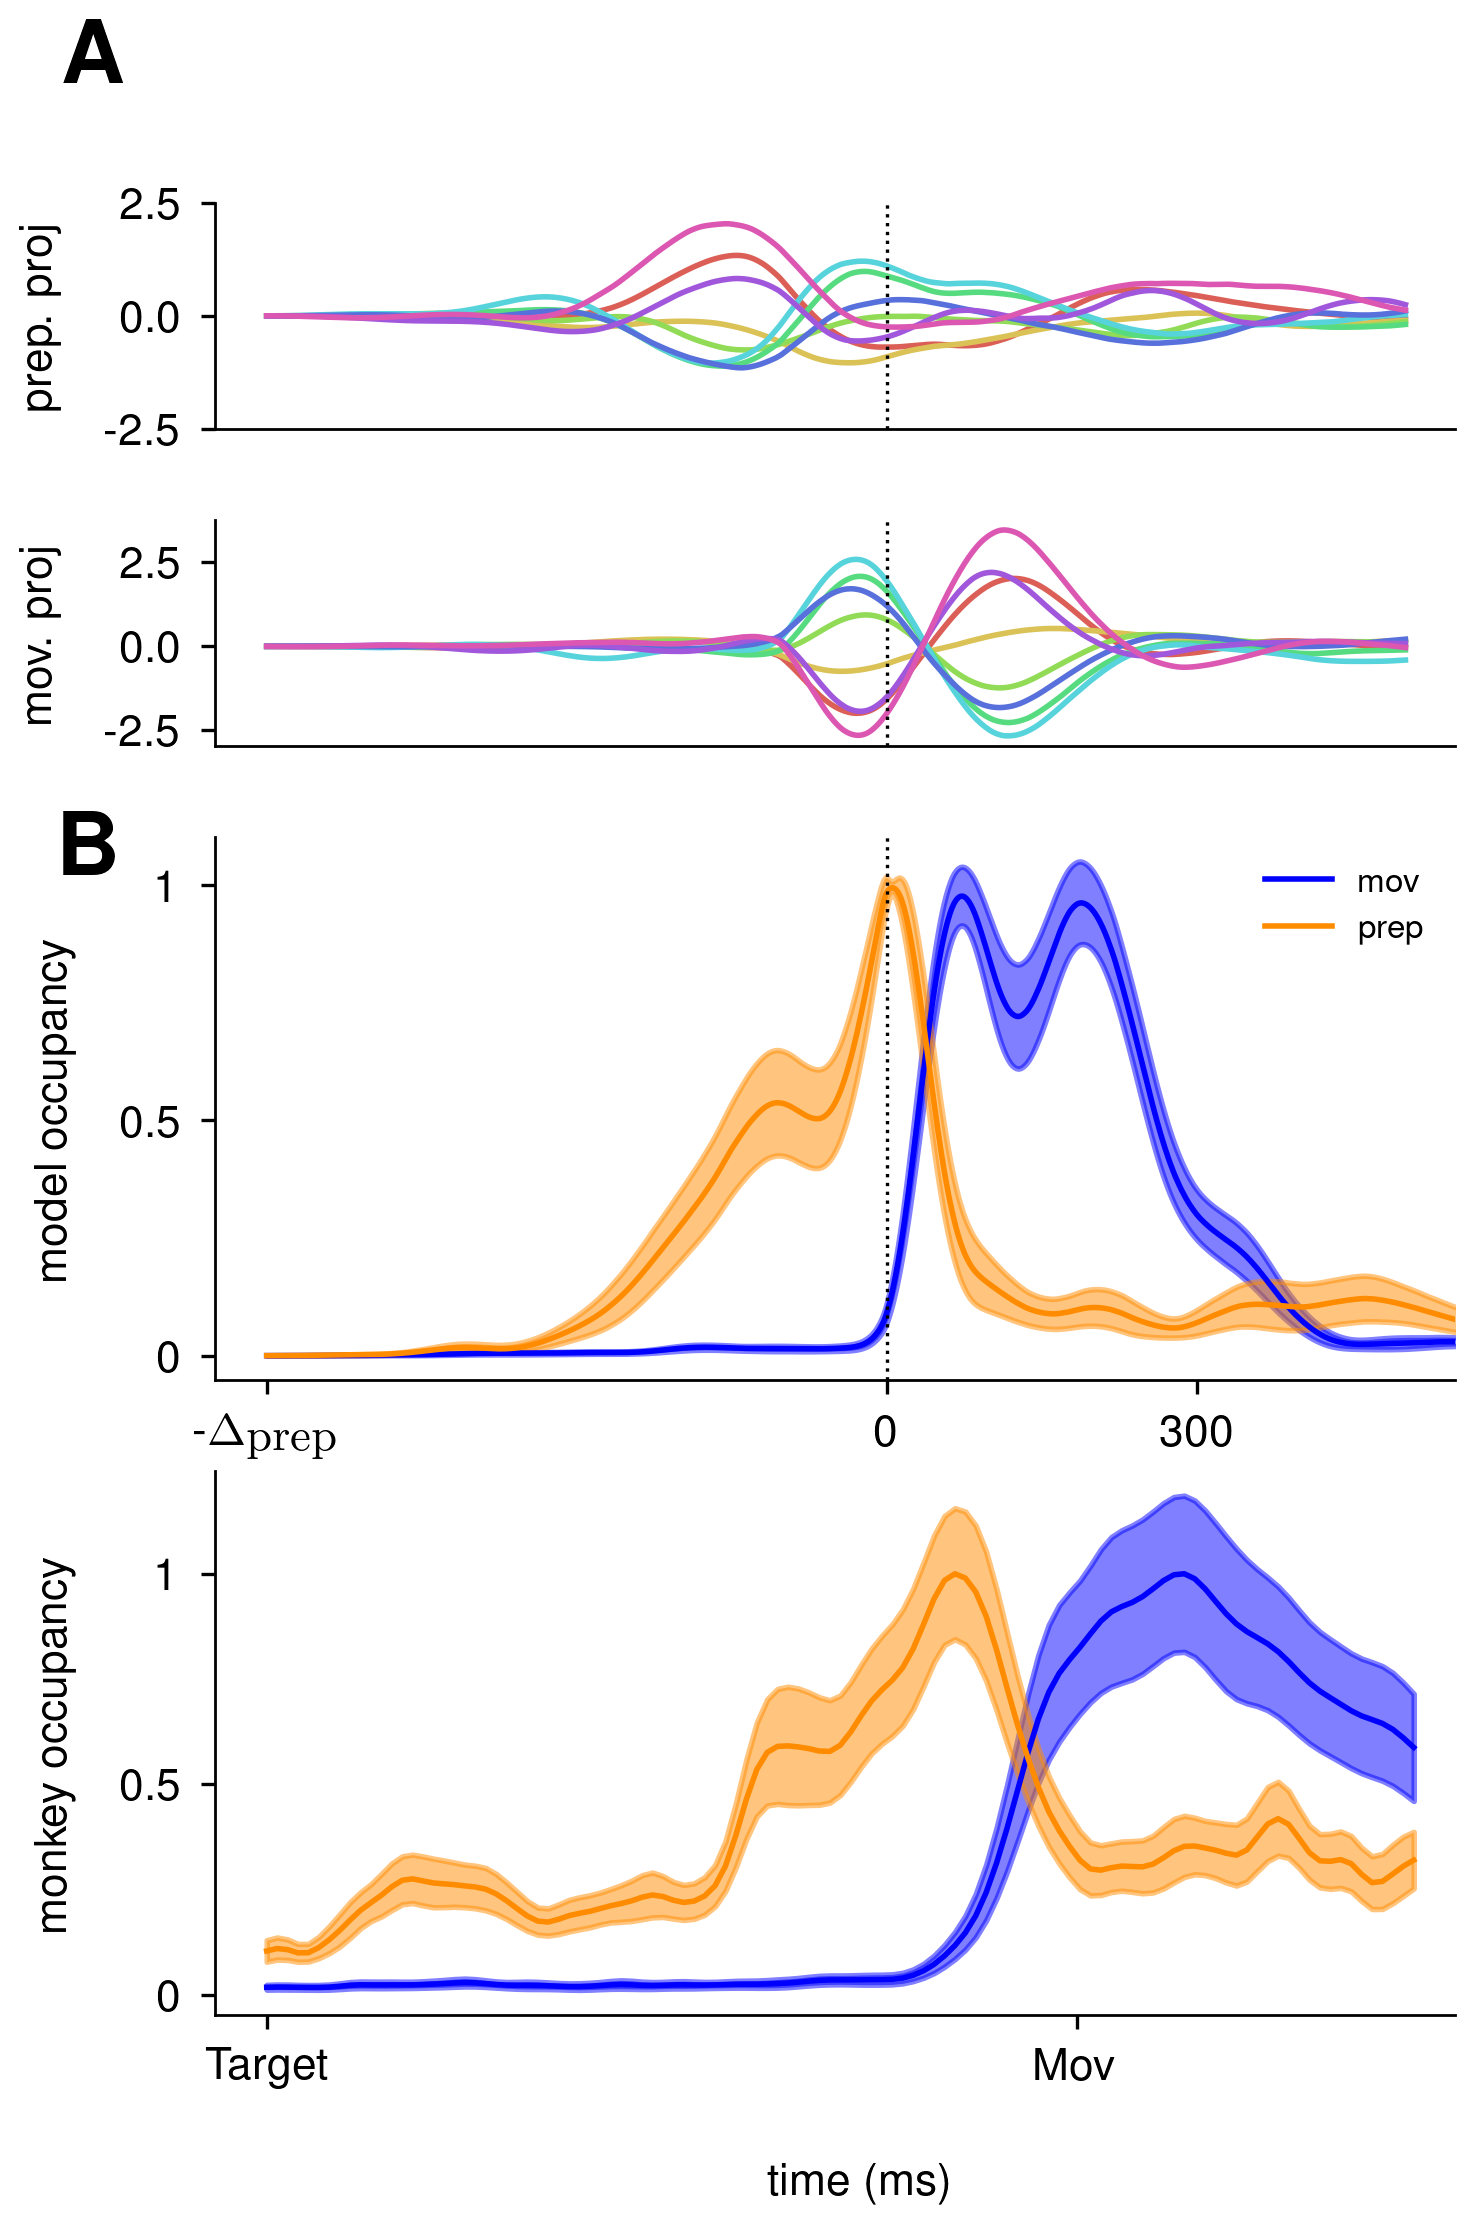

In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
palette = sns.color_palette("hls",8)

dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed"
n_dim = 6
def vprep(i):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{i}_mixed/analysis_{n_dim}/vprep")
def vmov(i):
    return np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_{i}_mixed/analysis_{n_dim}/vmov")
n_movs = 4
vpreps = np.concatenate([vprep(i)[:,None] for i in range(n_movs)], axis=1)
vmovs = np.concatenate([vmov(i )[:,None] for i in range(n_movs)], axis=1)
# vprep_mean = np.mean(vpreps, axis=1)
# vprep_sem = np.std(vpreps, axis=1)/np.sqrt(n_movs)
# vmov_mean = np.mean(vmovs, axis=1)
# vmov_sem = np.std(vmovs, axis=1)/np.sqrt(n_movs)

vprep_mean = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/analysis_{n_dim}/vprep_mean")
vmov_mean = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/analysis_{n_dim}/vmov_mean")
vprep_sem = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/analysis_{n_dim}/vprep_std")
vmov_sem = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed/analysis_{n_dim}/vmov_std")
#pct_var = np.loadtxt(f"{dir}/analysis_{n_dim}/capt_var")
#pct_var = np.concatenate([pct_var[0,:][None,:], pct_var[1:,:] - pct_var[0:-1,:]],axis=0)
## pct_var_own = np.loadtxt(f"{dir}/analysis/pct_var_own")
def proj_mov(i):
    return np.loadtxt(f"{dir}/analysis_{n_dim}/pre_proj_mov_{i}")

def proj_prep(i):
    return np.loadtxt(f"{dir}/analysis_{n_dim}/pre_proj_prep_{i}")
def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')

def rates(t, i = 3):
    return np.loadtxt(f'{dir}/rates_{i}_{t}')
def us(t, i = 3):
    return np.loadtxt(f'{dir}/us_{i}_{t}')

#soc_alignment =  np.loadtxt(f"{dir}/analysis_{n_dim}/capt_var")[-1,0]
#baseline_soc =  np.mean(np.loadtxt(f"{dir}/analysis/baseline_alignments"))
fig = plt.figure(figsize=(4, 6), dpi = 400)
plt.subplots_adjust(hspace=0.4)
gs = gridspec.GridSpec(6, 1)
#ax12 = plt.subplot(gs[5, 1])
ax131 = plt.subplot(gs[0])
ax132 = plt.subplot(gs[1])
#pos132 = ax132.get_position()
#ax132.set_position([pos132.x0, pos132.y0 - 0.052, pos132.width, pos132.height])
ax14 = plt.subplot(gs[2:4])
ax15 = plt.subplot(gs[4:6])
#pos14 = ax14.get_position()
#ax14.set_position([pos14.x0, pos14.y0 - 0.064, pos14.width, pos14.height])
print(np.shape(proj_prep(0)))
for i in np.arange(8):
    ax131.plot(2*np.linspace(0, np.shape(proj_prep(0)[:,0])[0], np.shape(proj_prep(0)[:,0])[0]), proj_prep(i)[:,0], color = palette[i])
x_min = -50
x_max = 1150
ax131.set_xlim(x_min, x_max)
ax132.set_xlim(x_min, x_max)
ax14.set_xlim(x_min, x_max)
ax15.set_xlim(x_min, x_max)
ax131.axvline(x = 600,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax131.set_xticks([])
ax131.set_yticks([-2.5,0.,2.5],[-2.5,0.,2.5], fontsize=fs)
ax131.set_ylabel("prep. proj")
current_pos = ax132.get_position()
for i in np.arange(8):
    ax132.plot(2*np.linspace(0, np.shape(proj_prep(0)[:,0])[0], np.shape(proj_prep(0)[:,0])[0]),proj_mov(i)[:,0], color = palette[i])
ax132.axvline(x = 600,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax132.set_xticks([])
ax132.set_yticks([-2.5,0.,2.5],[-2.5,0.,2.5], fontsize=fs)
ax132.set_ylabel("mov. proj")
current_pos = ax14.get_position()
ax14.plot(2*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vmov_mean, label = "mov", color="blue")
ax14.fill_between(2*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vmov_mean - 1.96*vmov_sem, vmov_mean + 1.96*vmov_sem, alpha = 0.5, color="blue")
ax14.plot(2*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vprep_mean, label = "prep", color="darkorange")
ax14.fill_between(2*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vprep_mean - 1.96*vprep_sem, vprep_mean + 1.96*vprep_sem, alpha = 0.5, color="darkorange")
ax14.axvline(x = 600,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax14.legend()
ax14.set_ylabel("model occupancy")
ax14.set_xticks([0,600,900], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs)
ax14.set_yticks([0,0.5,1], [0,0.5,1], fontsize =fs)
#########################################################
xmin, xmax = ax14.get_xlim()
mat = np.load("/home/mmcs3/code/why-prep-2/notebooks/laradat.npy", allow_pickle=True)
vmov_mean = mat[0][0][0][10:]
vmov_mean = mat[0][0][0][10:]/np.max(mat[0][0][0][10:])
vmov_sem = mat[0][0][1][10:]
vprep_mean = mat[0][0][2][10:]
vprep_mean = mat[0][0][2][10:]/np.max(mat[0][0][2][10:])
vprep_sem = mat[0][0][3][10:]
print(np.shape(vprep_mean))
print(vmov_sem.shape, vmov_mean.shape)
ax15.set_xlim(xmin, xmax)
bin_size = 10
ax15.plot(bin_size*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vprep_mean, label = "prep", color="blue")
ax15.fill_between(bin_size*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vprep_mean[:,0] - 1.96*vprep_sem[:,0], vprep_mean[:,0] + 1.96*vprep_sem[:,0], alpha = 0.5, color="blue")
ax15.plot(bin_size*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vmov_mean, label = "mov", color="darkorange")
ax15.fill_between(bin_size*np.linspace(0, np.shape(vmov_mean)[0], np.shape(vmov_mean)[0]), vmov_mean[:,0] - 1.96*vmov_sem[:,0], vmov_mean[:,0] + 1.96*vmov_sem[:,0], alpha = 0.5, color="darkorange")
#ax15.set_xticks([25, 700, 1000], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs)
ax15.set_xticks([0,784], ['Target', 'Mov'], fontsize=fs)
#ax15.axvline(x = 500,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax15.set_yticks([0,0.5,1], [], fontsize =fs)
ax15.set_yticks([0,0.5,1], [0,0.5,1], fontsize =fs)
ax15.set_ylabel("monkey occupancy")
fig.text(0.03, 0.93, '$\\textbf{A}$', size = 16)
fig.text(0.03, 0.6, '$\\textbf{B}$', size = 16)
#fig.text(0.5, 0.6, '$\\textbf{C}$', size = 16)
fig.text(0.47, 0.05, 'time (ms)', size = 8)
plt.show()
fig.savefig("occupancy.pdf", format = "pdf", bbox_inches='tight')

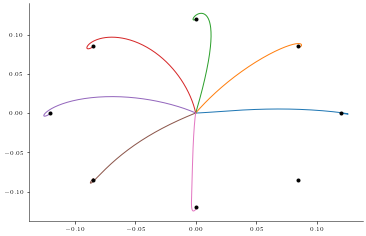

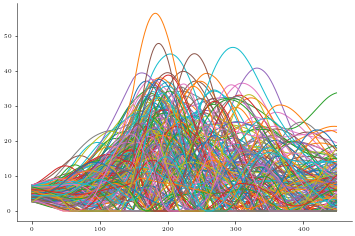

In [ ]:
def hands(i):
    return np.loadtxt(f"{dir}/hands_{i}_0")
for i in range(7):
    plt.plot(hands(i)[:,0] - hands(i)[0,0], hands(i)[:,2] - hands(i)[0,2])
hand_targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000004_9.0/ramping_soc/seed_0_mixed/hand_targets")

plt.plot(hand_targets[:,0], hand_targets[:,1], 'ok')
plt.figure()
def rates(i):
    return np.loadtxt(f"{dir}/rates_{i}_300")

plt.plot(rates(3)[:,:200])